# Data Mining Clinal Healthcare Data to Predict Heart Failure

### Context

Cardiovascular diseases (CVD's) are the number one cause of death globally taking an estimated 17.9 million lives each year. Four out of five CVD deaths can be attributed to heart attacks and strokes, with one-third of these deaths occur prematurely in individuals under 70 years old. Given that heart failure is known to correlate with common clinical features collected during routine check-ups, machine learning offers a cost-efficient way to screen individuals do determine if their relative risk level.

Authors:
- Gary Bair
- George Garcia
- Luis Perez

### Package Requirements

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import xgboost as xgb
import graphviz
import os
import random
import imblearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import multiprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_curve, roc_auc_score, confusion_matrix
from scipy.stats import loguniform
import statsmodels.api as sm

# Data Importing and Pre-processing

## Dataset Description

This dataset was created by combining datasets already available independently but not previously combined in the UCI Machine Learning Repository. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

Total: 1190 observations <br />
Duplicated: 272 observations <br />

Final dataset: 918 observations <br />

Origin: Kaggle <br />
File Type: CSV <br />
File Size: 35.1 kB <br />
Modeling Problem: Classification <br />
Missing Values: No <br />

The individual datasets used to construct the dataset used in this analysis can be referenced using the index of heart disease datasets from UCI Machine Learning Repository which can be found at the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

## Attribute Information:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


### Read Dataset and Display Info, 

In [2]:
df= pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Display Columns

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Dataframe Dimensions

In [5]:
df.shape

(918, 12)

### Missing Data

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We observe that there are no missing values in this dataset thus data imputation will not be required.

### Data Statistics

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Data Removal

In [8]:
cleaned_df = df[df.RestingBP >= 1]

In [9]:
cleaned_df = cleaned_df.drop(columns = ['Cholesterol'])

In [10]:
cleaned_df.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,1.000000,202.000000,6.200000,1.000000


### Data Transformation

In [11]:
cat_variables = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']
num_variables = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']

In [12]:
cat_dummies = pd.get_dummies(cleaned_df[cat_variables])

In [13]:
def mm_normalize(df,col_list):
    temp_df = pd.DataFrame()
    for col in col_list:
        temp_df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return temp_df

In [14]:
num_normed = mm_normalize(cleaned_df, num_variables)

In [15]:
processed_df = pd.concat([num_normed, cat_dummies, cleaned_df['HeartDisease']],axis = 1)

In [16]:
processed_df.head()

,Age,RestingBP,MaxHR,Oldpeak,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,0.244898,0.500000,0.788732,0.295455,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1,0.428571,0.666667,0.676056,0.409091,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1
2,0.183673,0.416667,0.267606,0.295455,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
3,0.408163,0.483333,0.338028,0.465909,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1
4,0.530612,0.583333,0.436620,0.295455,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0


# Data Analysis and Visualization

## Identifying Variable Types

### Categorical Features:
- Sex: sex of the patient [M: Male, F: Female] <br />
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] <br />
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] <br />
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy] <br />
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br />
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal] <br />

### Numerical Features:
- Age: age of the patient [years]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]


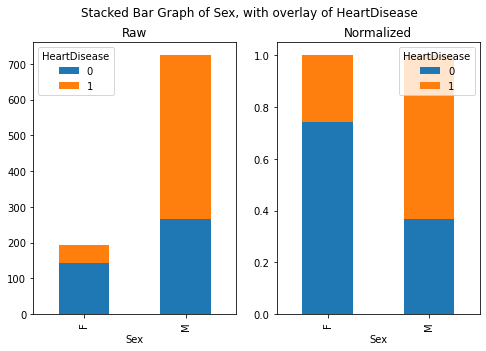

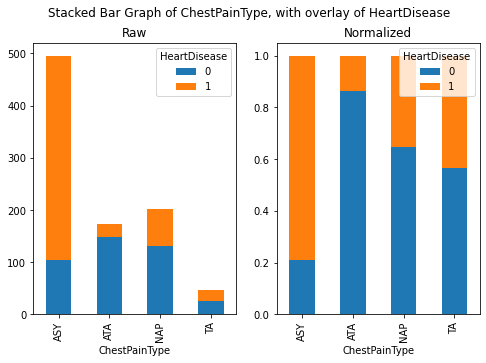

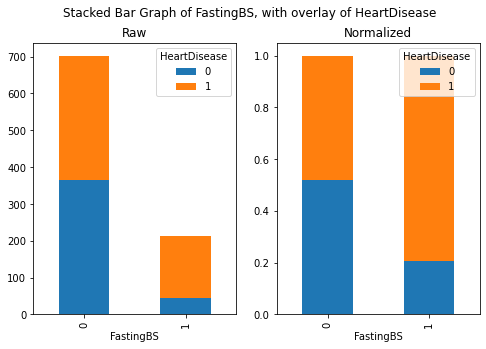

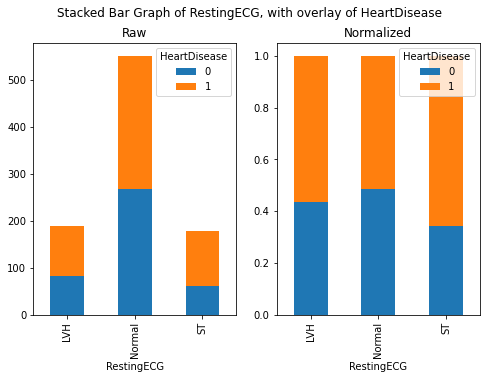

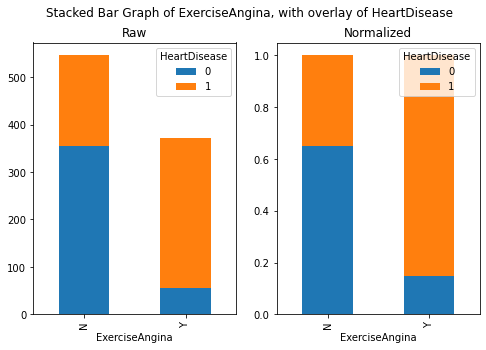

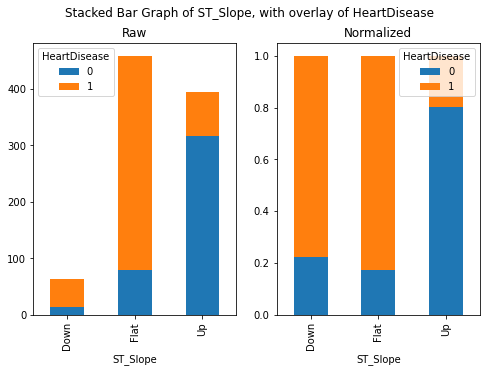

In [17]:
for col in cat_variables:
    crosstab = pd.crosstab(cleaned_df[col], cleaned_df['HeartDisease'])
    crosstab_norm = crosstab.div(crosstab.sum(1), axis = 0)
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)
    fig.suptitle('Stacked Bar Graph of {}, with overlay of HeartDisease'.format(col))
    ax1.set_title('Raw')
    crosstab.plot(kind = 'bar', ax = ax1, stacked = True, figsize = (8,5), sort_columns = True)
    ax2.set_title('Normalized')
    crosstab_norm.plot(kind = 'bar', ax = ax2, stacked = True, figsize = (8,5), sort_columns = True)

In [18]:
print('HeartDisease split')
print(cleaned_df.HeartDisease.value_counts(normalize = True))
print('\n')
for col in cat_variables:
    ct_1 = pd.crosstab(cleaned_df['HeartDisease'], df[col])
    ct_2 = pd.crosstab(cleaned_df['HeartDisease'], 
                       cleaned_df[col],
                       normalize = 'columns')
    print('{} Values'.format(col))
    print(ct_1)
    print('\n')
    print('{} Percentages'.format(col))
    print(ct_2)
    print('\n')

HeartDisease split
1    0.55289
0    0.44711
Name: HeartDisease, dtype: float64


Sex Values
Sex             F    M
HeartDisease          
0             143  267
1              50  457


Sex Percentages
Sex                  F         M
HeartDisease                    
0             0.740933  0.368785
1             0.259067  0.631215


ChestPainType Values
ChestPainType  ASY  ATA  NAP  TA
HeartDisease                    
0              104  149  131  26
1              392   24   71  20


ChestPainType Percentages
ChestPainType       ASY       ATA       NAP        TA
HeartDisease                                         
0              0.209677  0.861272  0.648515  0.565217
1              0.790323  0.138728  0.351485  0.434783


FastingBS Values
FastingBS       0    1
HeartDisease          
0             366   44
1             337  170


FastingBS Percentages
FastingBS            0         1
HeartDisease                    
0             0.520626  0.205607
1             0.479374  0.794393

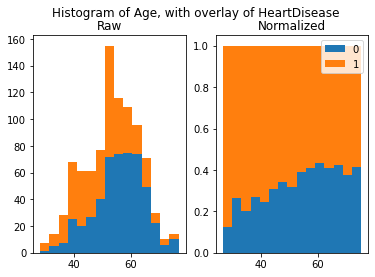

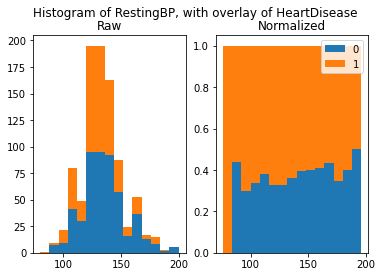

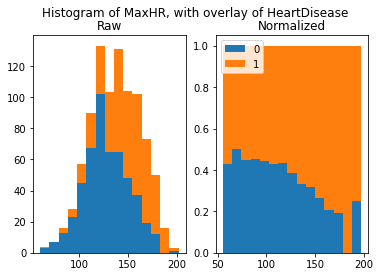

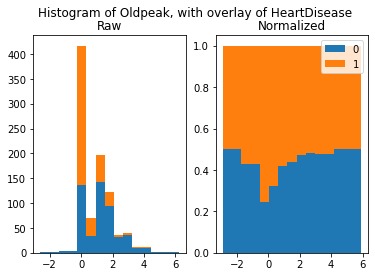

In [19]:
for col in num_variables:
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)

    y = cleaned_df[cleaned_df.HeartDisease == 1][col]
    n = cleaned_df[cleaned_df.HeartDisease == 0][col]
    
    n, bins, patches = ax1.hist([y, n], bins = 15, stacked = True, label = 'HeartDisease')
    n_table = np.column_stack((n[0], n[1]))
    n_sum = n_table.sum(axis=1)[:, None]
    n_norm = np.true_divide(n_table, n_sum)
    ourbins = np.column_stack((bins[0:15], bins[1:16]))
    
    ax2.bar(x = ourbins[:,0], 
            height = n_norm[:,1], 
            width = ourbins[:, 1] - ourbins[:, 0], 
            label = '0')
    ax2.bar(x = ourbins[:,0], 
            height = n_norm[:,1], 
            width = ourbins[:, 1] - ourbins[:, 0], 
            bottom = n_norm[:,0],
            label = '1')
    
    fig.suptitle('Histogram of {}, with overlay of HeartDisease'.format(col))
    ax1.set_title('Raw')
    ax2.set_title('Normalized')
    plt.legend()

In [20]:
processed_df[num_variables].describe()

,Age,RestingBP,MaxHR,Oldpeak
count,917.000000,917.000000,917.000000,917.000000
mean,0.520597,0.437841,0.540771,0.396215
std,0.192605,0.149998,0.179346,0.121245
min,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.333333,0.422535,0.295455
50%,0.530612,0.416667,0.549296,0.363636
75%,0.653061,0.500000,0.676056,0.465909
max,1.000000,1.000000,1.000000,1.000000


In [21]:
#df_cleaned[num_variables].describe().to_excel('Numerical_Descriptive_Statistics.xlsx')

In [22]:
processed_df[num_variables].skew()

Age         -0.195322
RestingBP    0.607195
MaxHR       -0.142459
Oldpeak      1.024545
dtype: float64

## Bivariate Analysis

In [23]:
corr = processed_df[num_variables].corr()
corr

,Age,RestingBP,MaxHR,Oldpeak
Age,1.000000,0.263084,-0.382280,0.258563
RestingBP,0.263084,1.000000,-0.109693,0.174252
MaxHR,-0.382280,-0.109693,1.000000,-0.161213
Oldpeak,0.258563,0.174252,-0.161213,1.000000


In [24]:
#corr.to_excel('numerical_correlation_coefficients_processed.xlsx')

<AxesSubplot:>

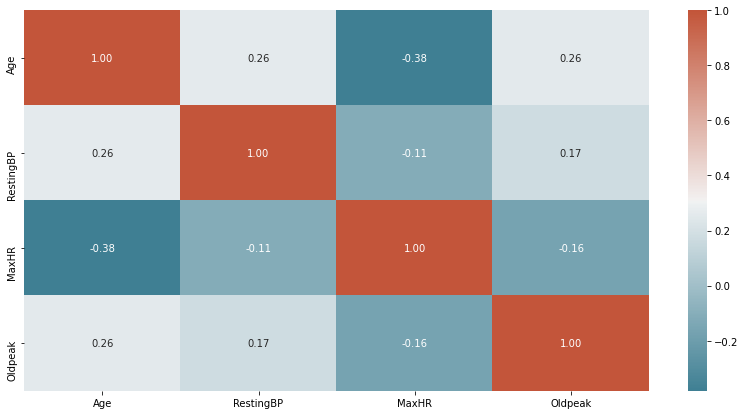

In [25]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize = (14,7))
sns.heatmap(corr, 
            cmap = cmap,
            annot = True , 
            fmt = '.2f')

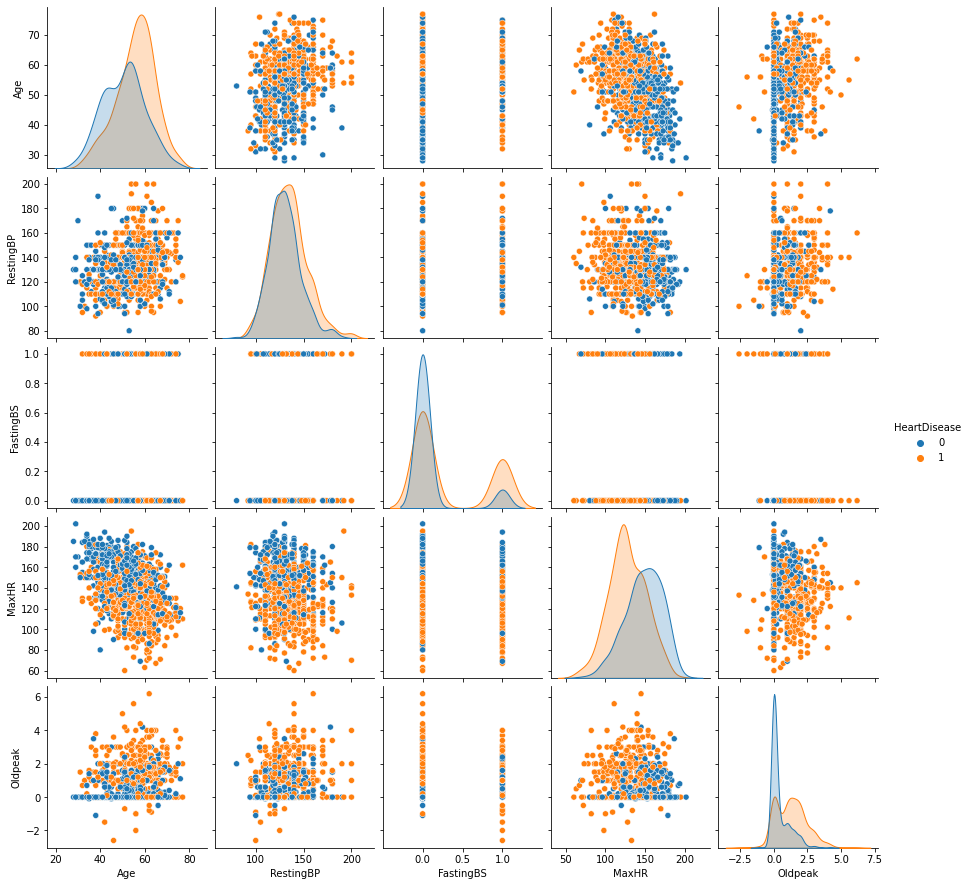

In [26]:
sns.pairplot(cleaned_df, hue = 'HeartDisease')

# Data Analytics

### Data Partitioning and Balancing

In [27]:
y = processed_df['HeartDisease']
y_names = ['Heart Disease','No Heart Disease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [28]:
X = processed_df
X.drop(columns = 'HeartDisease',inplace = True)
X_names =['Age',
          'RestingBP',
          'MaxHR',
          'Oldpeak',
          'FastingBS',
          'Female', 'Male',
          'ChestPainType_Asymptomatic','ChestPainType_ATA','ChestPainType_TA', 'ChestPainType_NAP',
          'RestingECG_LVH','RestingECG_Normal', 'RestingECG_ST',
          'ExerciseAngina_N','ExerciseAngina_Y',
          'ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up']
X.head()

,Age,RestingBP,MaxHR,Oldpeak,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.500000,0.788732,0.295455,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.666667,0.676056,0.409091,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.416667,0.267606,0.295455,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.483333,0.338028,0.465909,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.583333,0.436620,0.295455,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)

### Resampling

In [30]:
print('Target Feature Counts')
print(y_train.value_counts())

print('Target Feature Distribution')
print(y_train.value_counts(normalize = True))

Target Feature Counts
1    352
0    289
Name: HeartDisease, dtype: int64
Target Feature Distribution
1    0.549142
0    0.450858
Name: HeartDisease, dtype: float64


The default distribution of HeartDisease is observed to be roughly a 54%/46% split.

In [31]:
over_sampler = SMOTE(k_neighbors=2)
X_train_reb, y_train_reb = over_sampler.fit_resample(X_train, y_train)

print('Target Feature Distribution after Rebalancing')
print(y_train_reb.value_counts(normalize = True))

Target Feature Distribution after Rebalancing
0    0.5
1    0.5
Name: HeartDisease, dtype: float64


The training dataset now has a 50%/50% split. The test dataset is unmodified and will remain as such. Due to how SMOTE operates, we must recast y_train_reb to NumPy array.

## Logistic Regression

### Baseline Model with Scikit-Learn Default Values

In [32]:
lr_baseline = LogisticRegression()

lr_baseline.fit(X_train_reb, y_train_reb)

lr_baseline_y_train = lr_baseline.predict(X_train_reb)
lr_baseline_y_test = lr_baseline.predict(X_test)

### Baseline Model Evaluation

In [33]:
ct_lr_train = pd.DataFrame()
ct_lr_train['Train_Actual'] = y_train_reb
ct_lr_train['LR_Baseline_Train'] = lr_baseline_y_train

lr_baseline_confusion_train = pd.crosstab(ct_lr_train['Train_Actual'],
                                          ct_lr_train['LR_Baseline_Train'])
lr_baseline_confusion_train

LR_Baseline_Train,0,1
Train_Actual,,
0,294,58
1,47,305


In [34]:
ct_lr_test = pd.DataFrame()
ct_lr_test['Test_Actual'] = y_test
ct_lr_test['LR_Baseline_Test'] = lr_baseline_y_test

lr_baseline_confusion_test = pd.crosstab(ct_lr_test['Test_Actual'],
                                ct_lr_test['LR_Baseline_Test'])
lr_baseline_confusion_test

LR_Baseline_Test,0,1
Test_Actual,,
0,101,20
1,21,134


In [35]:
data = [accuracy_score(y_train_reb, lr_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, lr_baseline_y_train),
        recall_score(y_train_reb, lr_baseline_y_train),
        fbeta_score(y_train_reb, lr_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, lr_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, lr_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, lr_baseline_y_train)
       ]


test_names = ['Accuracy',
              'Precision',
              'Recall',
              'F1',
              'F2',
              'F0.5',
              'AUC ROC'
             ]

Training_Performance_Table = pd.DataFrame(data, 
                                          index = test_names, 
                                          columns = ['LR_Baseline'])

In [36]:
data = [accuracy_score(y_test, lr_baseline_y_test, normalize=True), 
        precision_score(y_test, lr_baseline_y_test),
        recall_score(y_test, lr_baseline_y_test),
        fbeta_score(y_test, lr_baseline_y_test, beta=1),
        fbeta_score(y_test, lr_baseline_y_test, beta=2),
        fbeta_score(y_test, lr_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, lr_baseline_y_test)
       ]


test_names = ['Accuracy',
              'Precision',
              'Recall',
              'F1',
              'F2',
              'F0.5',
              'AUC ROC'
             ]

Test_Performance_Table = pd.DataFrame(data, 
                                      index = test_names, 
                                      columns = ['LR_Baseline'])

In [37]:
Training_Performance_Table

,LR_Baseline
Accuracy,0.850852
Precision,0.840220
Recall,0.866477
F1,0.853147
F2,0.861095
F0.5,0.845344
AUC ROC,0.850852


In [38]:
Test_Performance_Table

,LR_Baseline
Accuracy,0.851449
Precision,0.870130
Recall,0.864516
F1,0.867314
F2,0.865633
F0.5,0.869001
AUC ROC,0.849613


## V1 Model using GridSearchCV

Hyperparameters Observed:
1. Norm Penalty(penalty) - (none, l1, l2, elasticnet)
2. Inverse of Regularization Strength(C) - (0.001, 0.01, 0.1, 1, 10, 100)
3. Elastic-Net Mixing Parameter(l1_ratio) - (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1)
4. Random State - 0
5. Solver - SAGA

Notes: 
- Elastic-Net Mixing Parameter is only explored as it is a necessary sub-parameter used in Elastic Net regularization.
- SAGA solver is specified as it supports all norm penalties supported in this library

In [39]:
lr_space = dict()
lr_space['C'] = [0.001,0.01,0.1,1,10,100]
lr_space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
lr_space['l1_ratio'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [40]:
lr = LogisticRegression(solver = 'saga')
lr_gs = GridSearchCV(lr, 
                     lr_space, 
                     scoring = 'accuracy', 
                     n_jobs = -1)
lr_gs.fit(X_train_reb, y_train_reb)

print('Best Hyperparameters: %s' % lr_gs.best_params_)

Best Hyperparameters: {'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'elasticnet'}


In [41]:
lr_v1_y_train = lr_gs.predict(X_train_reb)
lr_v1_y_test = lr_gs.predict(X_test)

### V1 Model Evaluation

In [42]:
ct_lr_train['LR_V1_Train'] = lr_v1_y_train

lr_v1_confusion_train = pd.crosstab(ct_lr_train['Train_Actual'],
                                    ct_lr_train['LR_V1_Train'])
lr_v1_confusion_train

LR_V1_Train,0,1
Train_Actual,,
0,294,58
1,38,314


In [43]:
ct_lr_test['LR_V1_Test'] = lr_v1_y_test

lr_v1_confusion_test = pd.crosstab(ct_lr_test['Test_Actual'],
                                   ct_lr_test['LR_V1_Test'])
lr_v1_confusion_test

LR_V1_Test,0,1
Test_Actual,,
0,101,20
1,26,129


In [44]:
data = [accuracy_score(y_train_reb, lr_v1_y_train, normalize=True), 
        precision_score(y_train_reb, lr_v1_y_train),
        recall_score(y_train_reb, lr_v1_y_train),
        fbeta_score(y_train_reb, lr_v1_y_train, beta=1),
        fbeta_score(y_train_reb, lr_v1_y_train, beta=2),
        fbeta_score(y_train_reb, lr_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, lr_v1_y_train)
       ]

Training_Performance_Table['LR_V1'] = data

In [45]:
data = [accuracy_score(y_test, lr_v1_y_test, normalize=True), 
        precision_score(y_test, lr_v1_y_test),
        recall_score(y_test, lr_v1_y_test),
        fbeta_score(y_test, lr_v1_y_test, beta=1),
        fbeta_score(y_test, lr_v1_y_test, beta=2),
        fbeta_score(y_test, lr_v1_y_test, beta=0.5),
        roc_auc_score(y_test, lr_v1_y_test)
       ]

Test_Performance_Table['LR_V1'] = data

In [46]:
Training_Performance_Table

,LR_Baseline,LR_V1
Accuracy,0.850852,0.863636
Precision,0.840220,0.844086
Recall,0.866477,0.892045
F1,0.853147,0.867403
F2,0.861095,0.882022
F0.5,0.845344,0.853261
AUC ROC,0.850852,0.863636


In [47]:
Test_Performance_Table

,LR_Baseline,LR_V1
Accuracy,0.851449,0.833333
Precision,0.870130,0.865772
Recall,0.864516,0.832258
F1,0.867314,0.848684
F2,0.865633,0.838752
F0.5,0.869001,0.858855
AUC ROC,0.849613,0.833484


Given that the increase in training set accuracy resulted in a decrease in the test set accuracy, it is reasonable to conclude that this is a sign of overfitting and further efforts to tune hyperparamters are unlikely to produce a notable increase in performance.

## V2 Model using Recursive Feature Elimination

For our final model, we aim to increase the models perfomance through dimensionality reduction. Given that the initial model uses the l2 penalty which allows coefficents to go to zero, we can use it as a starting point to determine which variables are least useful to our model.

In [48]:
lr_baseline.coef_

array([[ 0.6461105 ,  0.04911968, -0.82215155,  1.08114941,  1.0651908 ,
        -0.24362831,  1.08203838,  1.46141664, -0.52625956, -0.04748971,
         0.17335437,  0.28708446,  0.07844037, -0.00501298,  0.05864555,
         0.994797  ,  0.13618827,  1.16293948, -1.2988985 ]])

In [49]:
X_train_reb.columns

Index(['Age', 'RestingBP', 'MaxHR', 'Oldpeak', 'FastingBS', 'Sex_F', 'Sex_M',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y',
       'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [50]:
lr_v2_train = X_train_reb[['Age',
                           'RestingBP', 
                           'MaxHR', 
                           'Oldpeak', 
                           'FastingBS',
                           'Sex_F', 
                           'ChestPainType_ASY', 
                           'ExerciseAngina_N', 
                           'ST_Slope_Flat', 'ST_Slope_Up']]

In [51]:
lr_v2_test = X_test[['Age',
                     'RestingBP',
                     'MaxHR', 
                     'Oldpeak', 
                     'FastingBS',
                     'Sex_F', 
                     'ChestPainType_ASY', 
                     'ExerciseAngina_N', 
                     'ST_Slope_Flat', 'ST_Slope_Up']]

In [52]:
lr_v2 = LogisticRegression()
lr_v2.fit(lr_v2_train, y_train_reb)

lr_v2_y_train = lr_v2.predict(lr_v2_train)
lr_v2_y_test = lr_v2.predict(lr_v2_test)

In [53]:
lr_v2.coef_

array([[ 0.81025596,  0.06832813, -0.72029991,  1.20890743,  1.0549378 ,
        -1.27532254,  1.62775435, -0.82506771,  1.05795182, -1.4607935 ]])

### V2 Model Evaluation

In [54]:
ct_lr_train['LR_V2_Train'] = lr_v2_y_train

lr_v2_confusion_train = pd.crosstab(ct_lr_train['Train_Actual'],
                                    ct_lr_train['LR_V2_Train'])
lr_v2_confusion_train

LR_V2_Train,0,1
Train_Actual,,
0,296,56
1,48,304


In [55]:
ct_lr_test['LR_V2_Test'] = lr_v2_y_test

lr_v2_confusion_test = pd.crosstab(ct_lr_test['Test_Actual'],
                                   ct_lr_test['LR_V2_Test'])
lr_v2_confusion_test

LR_V2_Test,0,1
Test_Actual,,
0,103,18
1,22,133


In [56]:
data = [accuracy_score(y_train_reb, lr_v2_y_train, normalize=True), 
        precision_score(y_train_reb, lr_v2_y_train),
        recall_score(y_train_reb, lr_v2_y_train),
        fbeta_score(y_train_reb, lr_v2_y_train, beta=1),
        fbeta_score(y_train_reb, lr_v2_y_train, beta=2),
        fbeta_score(y_train_reb, lr_v2_y_train, beta=0.5),
        roc_auc_score(y_train_reb, lr_v2_y_train)
       ]

Training_Performance_Table['LR_V2'] = data

In [57]:
data = [accuracy_score(y_test, lr_v2_y_test, normalize=True), 
        precision_score(y_test, lr_v2_y_test),
        recall_score(y_test, lr_v2_y_test),
        fbeta_score(y_test, lr_v2_y_test, beta=1),
        fbeta_score(y_test, lr_v2_y_test, beta=2),
        fbeta_score(y_test, lr_v2_y_test, beta=0.5),
        roc_auc_score(y_test, lr_v2_y_test)
       ]

Test_Performance_Table['LR_V2'] = data

In [58]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2
Accuracy,0.850852,0.863636,0.852273
Precision,0.840220,0.844086,0.844444
Recall,0.866477,0.892045,0.863636
F1,0.853147,0.867403,0.853933
F2,0.861095,0.882022,0.859729
F0.5,0.845344,0.853261,0.848214
AUC ROC,0.850852,0.863636,0.852273


In [59]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2
Accuracy,0.851449,0.833333,0.855072
Precision,0.870130,0.865772,0.880795
Recall,0.864516,0.832258,0.858065
F1,0.867314,0.848684,0.869281
F2,0.865633,0.838752,0.862516
F0.5,0.869001,0.858855,0.876153
AUC ROC,0.849613,0.833484,0.854652


Eliminating roughly have the predictors in the dataset yielded improvements in model accuracy on the test with little to no effect on the training set.

## CART Decision Tree

### Baseline Model with Scikit-Learn Default Values

Hyperparameters Observed:
1. Minimum Number of Samples Required to be at a Leaf Node(C) - 1

In [60]:
cart_baseline = DecisionTreeClassifier()
cart_baseline.fit(X_train_reb, y_train_reb)

cart_baseline_y_train = cart_baseline.predict(X_train_reb)
cart_baseline_y_test = cart_baseline.predict(X_test)

[Text(554.9853078358209, 526.6125000000001, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 704\nvalue = [352, 352]\nclass = Heart Disease'),
 Text(284.0750932835821, 492.63750000000005, 'ChestPainType_Asymptomatic <= 0.5\ngini = 0.328\nsamples = 387\nvalue = [80, 307]\nclass = No Heart Disease'),
 Text(121.45522388059702, 458.6625, 'Male <= 0.5\ngini = 0.482\nsamples = 126\nvalue = [51, 75]\nclass = No Heart Disease'),
 Text(55.52238805970149, 424.6875, 'Oldpeak <= 0.301\ngini = 0.355\nsamples = 26\nvalue = [20, 6]\nclass = Heart Disease'),
 Text(33.3134328358209, 390.7125, 'RestingECG_LVH <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = No Heart Disease'),
 Text(22.208955223880597, 356.7375, 'ChestPainType_ATA <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = No Heart Disease'),
 Text(11.104477611940299, 322.76250000000005, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = No Heart Disease'),
 Text(33.3134328358209, 322.76250000000005, 'gini = 0.0\nsamples = 1\nvalue = [

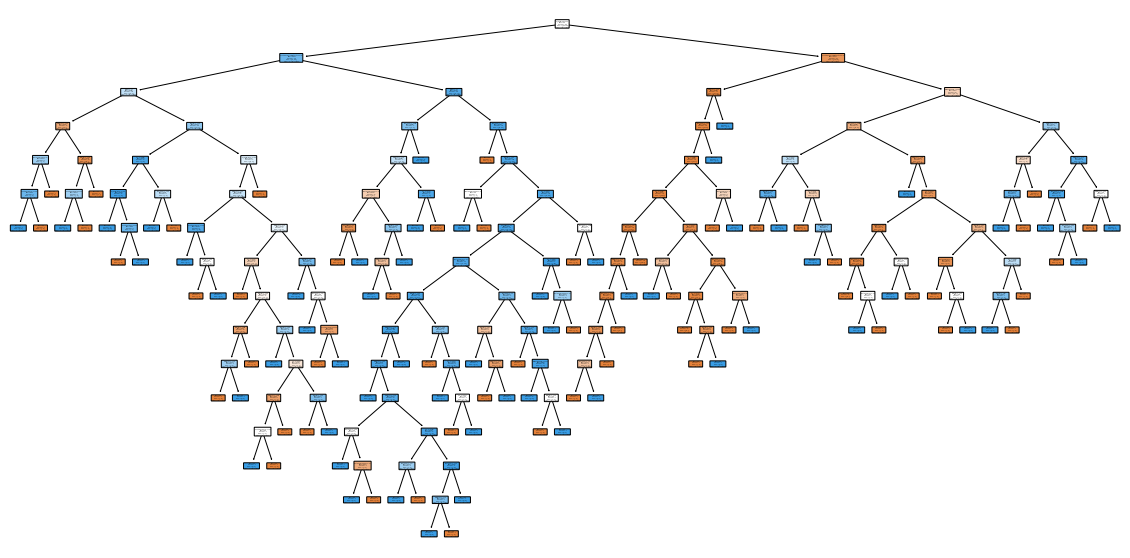

In [61]:
plt.figure(figsize=(20,10))
tree.plot_tree(cart_baseline, 
               filled = True,
               rounded =True, 
               class_names = y_names,
               feature_names = X_names)

### Baseline Model Evaluation

In [62]:
ct_cart_train = pd.DataFrame()
ct_cart_train['Train_Actual'] = y_train_reb
ct_cart_train['CART_Baseline_Train'] = cart_baseline_y_train

cart_baseline_confusion_train = pd.crosstab(ct_cart_train['Train_Actual'],
                                          ct_cart_train['CART_Baseline_Train'])
cart_baseline_confusion_train

CART_Baseline_Train,0,1
Train_Actual,,
0,352,0
1,0,352


In [63]:
ct_cart_test = pd.DataFrame()
ct_cart_test['Test_Actual'] = y_test
ct_cart_test['CART_Baseline_Test'] = cart_baseline_y_test

cart_baseline_confusion_test = pd.crosstab(ct_cart_test['Test_Actual'],
                                           ct_cart_test['CART_Baseline_Test'])
cart_baseline_confusion_test

CART_Baseline_Test,0,1
Test_Actual,,
0,93,28
1,35,120


In [64]:
data = [accuracy_score(y_train_reb, cart_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, cart_baseline_y_train),
        recall_score(y_train_reb, cart_baseline_y_train),
        fbeta_score(y_train_reb, cart_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, cart_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, cart_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, cart_baseline_y_train)
       ]

Training_Performance_Table['CART_Baseline'] = data

In [65]:
data = [accuracy_score(y_test, cart_baseline_y_test, normalize=True), 
        precision_score(y_test, cart_baseline_y_test),
        recall_score(y_test, cart_baseline_y_test),
        fbeta_score(y_test, cart_baseline_y_test, beta=1),
        fbeta_score(y_test, cart_baseline_y_test, beta=2),
        fbeta_score(y_test, cart_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, cart_baseline_y_test)
       ]

Test_Performance_Table['CART_Baseline'] = data

In [66]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline
Accuracy,0.850852,0.863636,0.852273,1.0
Precision,0.840220,0.844086,0.844444,1.0
Recall,0.866477,0.892045,0.863636,1.0
F1,0.853147,0.867403,0.853933,1.0
F2,0.861095,0.882022,0.859729,1.0
F0.5,0.845344,0.853261,0.848214,1.0
AUC ROC,0.850852,0.863636,0.852273,1.0


In [67]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline
Accuracy,0.851449,0.833333,0.855072,0.771739
Precision,0.870130,0.865772,0.880795,0.810811
Recall,0.864516,0.832258,0.858065,0.774194
F1,0.867314,0.848684,0.869281,0.792079
F2,0.865633,0.838752,0.862516,0.781250
F0.5,0.869001,0.858855,0.876153,0.803213
AUC ROC,0.849613,0.833484,0.854652,0.771394


Inspection of the performance metrics of the baseline model indicates that, unsurprisingly, the model has significant overfitting. Minimizing this is the goal of the following model.

### V1 Model

Hyperparameters of Interest:
1. Maximum Depth of the Tree(max_depth) - 4

In [68]:
cart_v1 = DecisionTreeClassifier(max_depth = 4)

cart_v1.fit(X_train_reb, y_train_reb)

cart_v1_y_train = cart_v1.predict(X_train_reb)
cart_v1_y_test = cart_v1.predict(X_test)

[Text(587.8928571428571, 489.24, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 704\nvalue = [352, 352]\nclass = Heart Disease'),
 Text(318.85714285714283, 380.52000000000004, 'ChestPainType_Asymptomatic <= 0.5\ngini = 0.328\nsamples = 387\nvalue = [80, 307]\nclass = No Heart Disease'),
 Text(159.42857142857142, 271.8, 'Male <= 0.5\ngini = 0.482\nsamples = 126\nvalue = [51, 75]\nclass = No Heart Disease'),
 Text(79.71428571428571, 163.08000000000004, 'Oldpeak <= 0.301\ngini = 0.355\nsamples = 26\nvalue = [20, 6]\nclass = Heart Disease'),
 Text(39.857142857142854, 54.360000000000014, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = No Heart Disease'),
 Text(119.57142857142856, 54.360000000000014, 'gini = 0.18\nsamples = 20\nvalue = [18, 2]\nclass = Heart Disease'),
 Text(239.1428571428571, 163.08000000000004, 'MaxHR <= 0.489\ngini = 0.428\nsamples = 100\nvalue = [31, 69]\nclass = No Heart Disease'),
 Text(199.28571428571428, 54.360000000000014, 'gini = 0.145\nsamples = 38\nvalue = [3, 35

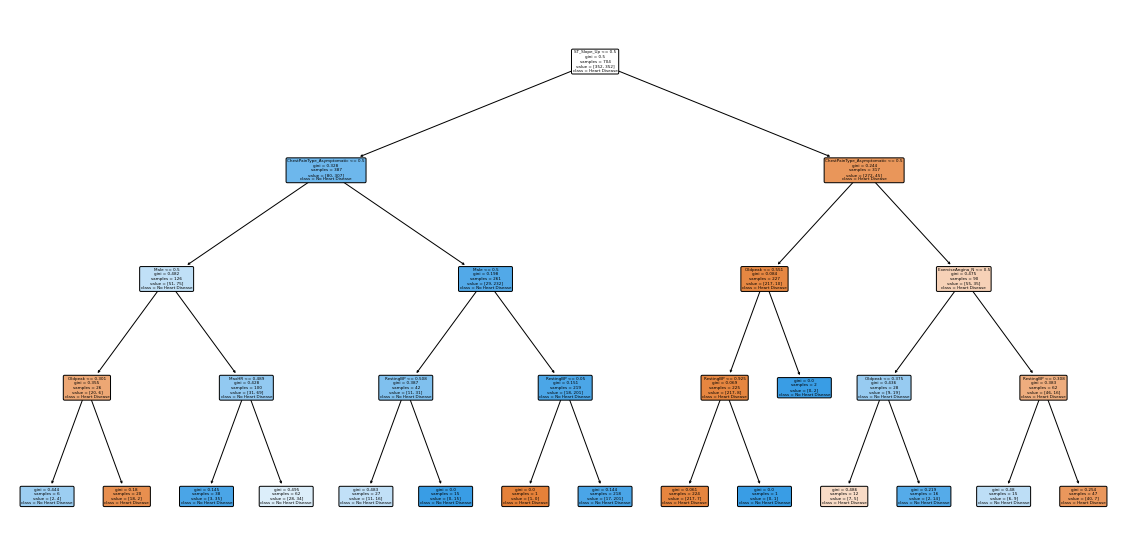

In [69]:
plt.figure(figsize=(20,10))
tree.plot_tree(cart_v1, 
               filled = True,
               rounded =True, 
               class_names = y_names,
               feature_names = X_names)

### V1 Model Evaluation

In [70]:
ct_cart_train['CART_V1_Train'] = cart_v1_y_train

cart_v1_confusion_train = pd.crosstab(ct_cart_train['Train_Actual'],
                                      ct_cart_train['CART_V1_Train'])
cart_v1_confusion_train

CART_V1_Train,0,1
Train_Actual,,
0,283,69
1,21,331


In [71]:
ct_cart_test['CART_V1_Test'] = cart_v1_y_test

cart_v1_confusion_test = pd.crosstab(ct_cart_test['Test_Actual'],
                                     ct_cart_test['CART_V1_Test'])
cart_v1_confusion_test

CART_V1_Test,0,1
Test_Actual,,
0,91,30
1,22,133


In [72]:
data = [accuracy_score(y_train_reb, cart_v1_y_train, normalize=True), 
        precision_score(y_train_reb, cart_v1_y_train),
        recall_score(y_train_reb, cart_v1_y_train),
        fbeta_score(y_train_reb, cart_v1_y_train, beta=1),
        fbeta_score(y_train_reb, cart_v1_y_train, beta=2),
        fbeta_score(y_train_reb, cart_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, cart_v1_y_train)
       ]

Training_Performance_Table['CART_V1'] = data

In [73]:
data = [accuracy_score(y_test, cart_v1_y_test, normalize=True), 
        precision_score(y_test, cart_v1_y_test),
        recall_score(y_test, cart_v1_y_test),
        fbeta_score(y_test, cart_v1_y_test, beta=1),
        fbeta_score(y_test, cart_v1_y_test, beta=2),
        fbeta_score(y_test, cart_v1_y_test, beta=0.5),
        roc_auc_score(y_test, cart_v1_y_test)
       ]

Test_Performance_Table['CART_V1'] = data

In [74]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1
Accuracy,0.850852,0.863636,0.852273,1.0,0.872159
Precision,0.840220,0.844086,0.844444,1.0,0.827500
Recall,0.866477,0.892045,0.863636,1.0,0.940341
F1,0.853147,0.867403,0.853933,1.0,0.880319
F2,0.861095,0.882022,0.859729,1.0,0.915376
F0.5,0.845344,0.853261,0.848214,1.0,0.847848
AUC ROC,0.850852,0.863636,0.852273,1.0,0.872159


In [75]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1
Accuracy,0.851449,0.833333,0.855072,0.771739,0.811594
Precision,0.870130,0.865772,0.880795,0.810811,0.815951
Recall,0.864516,0.832258,0.858065,0.774194,0.858065
F1,0.867314,0.848684,0.869281,0.792079,0.836478
F2,0.865633,0.838752,0.862516,0.781250,0.849298
F0.5,0.869001,0.858855,0.876153,0.803213,0.824040
AUC ROC,0.849613,0.833484,0.854652,0.771394,0.805065


Inspecting the performance metrics indicates the effort to reduce overfitting was successful and there is likely further room to improve the model.

### V2 Model

In [76]:
cart_v2 = DecisionTreeClassifier(min_impurity_decrease = .004)

cart_v2.fit(X_train_reb, y_train_reb)

cart_v2_y_train = cart_v2.predict(X_train_reb)
cart_v2_y_test = cart_v2.predict(X_test)

### V2 Model Evaluation

[Text(511.5, 498.3, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 704\nvalue = [352, 352]\nclass = Heart Disease'),
 Text(310.0, 407.70000000000005, 'ChestPainType_Asymptomatic <= 0.5\ngini = 0.328\nsamples = 387\nvalue = [80, 307]\nclass = No Heart Disease'),
 Text(248.0, 317.1, 'Male <= 0.5\ngini = 0.482\nsamples = 126\nvalue = [51, 75]\nclass = No Heart Disease'),
 Text(124.0, 226.5, 'Oldpeak <= 0.301\ngini = 0.355\nsamples = 26\nvalue = [20, 6]\nclass = Heart Disease'),
 Text(62.0, 135.89999999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = No Heart Disease'),
 Text(186.0, 135.89999999999998, 'gini = 0.18\nsamples = 20\nvalue = [18, 2]\nclass = Heart Disease'),
 Text(372.0, 226.5, 'MaxHR <= 0.489\ngini = 0.428\nsamples = 100\nvalue = [31, 69]\nclass = No Heart Disease'),
 Text(310.0, 135.89999999999998, 'gini = 0.145\nsamples = 38\nvalue = [3, 35]\nclass = No Heart Disease'),
 Text(434.0, 135.89999999999998, 'gini = 0.495\nsamples = 62\nvalue = [28, 34]\nclass = No Heart D

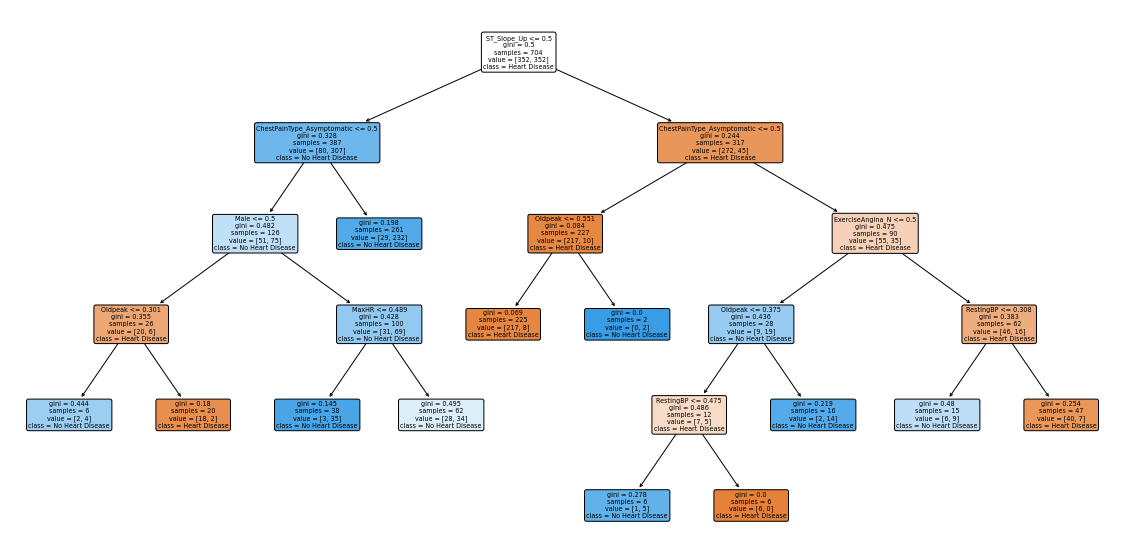

In [77]:
plt.figure(figsize=(20,10))
tree.plot_tree(cart_v2, 
               filled = True,
               rounded =True, 
               class_names = y_names,
               feature_names = X_names)

In [78]:
ct_cart_train['CART_V2_Train'] = cart_v2_y_train

cart_v2_confusion_train = pd.crosstab(ct_cart_train['Train_Actual'],
                                      ct_cart_train['CART_V2_Train'])
cart_v2_confusion_train

CART_V2_Train,0,1
Train_Actual,,
0,281,71
1,17,335


In [79]:
ct_cart_test['CART_V2_Test'] = cart_v2_y_test

cart_v2_confusion_test = pd.crosstab(ct_cart_test['Test_Actual'],
                                     ct_cart_test['CART_V2_Test'])
cart_v2_confusion_test

CART_V2_Test,0,1
Test_Actual,,
0,89,32
1,19,136


In [80]:
data = [accuracy_score(y_train_reb, cart_v2_y_train, normalize=True), 
        precision_score(y_train_reb, cart_v2_y_train),
        recall_score(y_train_reb, cart_v2_y_train),
        fbeta_score(y_train_reb, cart_v2_y_train, beta=1),
        fbeta_score(y_train_reb, cart_v2_y_train, beta=2),
        fbeta_score(y_train_reb, cart_v2_y_train, beta=0.5),
        roc_auc_score(y_train_reb, cart_v2_y_train)
       ]

Training_Performance_Table['CART_V2'] = data

In [81]:
data = [accuracy_score(y_test, cart_v2_y_test, normalize=True), 
        precision_score(y_test, cart_v2_y_test),
        recall_score(y_test, cart_v2_y_test),
        fbeta_score(y_test, cart_v2_y_test, beta=1),
        fbeta_score(y_test, cart_v2_y_test, beta=2),
        fbeta_score(y_test, cart_v2_y_test, beta=0.5),
        roc_auc_score(y_test, cart_v2_y_test)
       ]

Test_Performance_Table['CART_V2'] = data

In [82]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2
Accuracy,0.850852,0.863636,0.852273,1.0,0.872159,0.875000
Precision,0.840220,0.844086,0.844444,1.0,0.827500,0.825123
Recall,0.866477,0.892045,0.863636,1.0,0.940341,0.951705
F1,0.853147,0.867403,0.853933,1.0,0.880319,0.883905
F2,0.861095,0.882022,0.859729,1.0,0.915376,0.923374
F0.5,0.845344,0.853261,0.848214,1.0,0.847848,0.847672
AUC ROC,0.850852,0.863636,0.852273,1.0,0.872159,0.875000


In [83]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2
Accuracy,0.851449,0.833333,0.855072,0.771739,0.811594,0.815217
Precision,0.870130,0.865772,0.880795,0.810811,0.815951,0.809524
Recall,0.864516,0.832258,0.858065,0.774194,0.858065,0.877419
F1,0.867314,0.848684,0.869281,0.792079,0.836478,0.842105
F2,0.865633,0.838752,0.862516,0.781250,0.849298,0.862944
F0.5,0.869001,0.858855,0.876153,0.803213,0.824040,0.822249
AUC ROC,0.849613,0.833484,0.854652,0.771394,0.805065,0.806478


Inspecting the performance metrics indicates the effort to reduce overfitting was successful and there is likely further room to improve the model.

## XGBoost

### Baseline Model with Scikit-Learn Default Values

In [84]:
xgb_baseline = xgb.XGBClassifier(use_label_encoder = False)
xgb_baseline.fit(X_train_reb, y_train_reb)

xgb_baseline_y_train = xgb_baseline.predict(X_train_reb)
xgb_baseline_y_test = xgb_baseline.predict(X_test)

[23:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Baseline Model Evaluation

In [85]:
ct_xgb_train = pd.DataFrame()
ct_xgb_train['Train_Actual'] = y_train_reb
ct_xgb_train['XGB_Baseline_Train'] = xgb_baseline_y_train

xgb_baseline_confusion_train = pd.crosstab(ct_xgb_train['Train_Actual'],
                                           ct_xgb_train['XGB_Baseline_Train'])
xgb_baseline_confusion_train

XGB_Baseline_Train,0,1
Train_Actual,,
0,352,0
1,0,352


In [86]:
ct_xgb_test = pd.DataFrame()
ct_xgb_test['Test_Actual'] = y_test
ct_xgb_test['XGB_Baseline_Test'] = xgb_baseline_y_test

xgb_baseline_confusion_test = pd.crosstab(ct_xgb_test['Test_Actual'],
                                          ct_xgb_test['XGB_Baseline_Test'])
xgb_baseline_confusion_test

XGB_Baseline_Test,0,1
Test_Actual,,
0,100,21
1,22,133


In [87]:
data = [accuracy_score(y_train_reb, xgb_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, xgb_baseline_y_train),
        recall_score(y_train_reb, xgb_baseline_y_train),
        fbeta_score(y_train_reb, xgb_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, xgb_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, xgb_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, xgb_baseline_y_train)
       ]

Training_Performance_Table['XGB_Baseline'] = data

In [88]:
data = [accuracy_score(y_test, xgb_baseline_y_test, normalize=True), 
        precision_score(y_test, xgb_baseline_y_test),
        recall_score(y_test, xgb_baseline_y_test),
        fbeta_score(y_test, xgb_baseline_y_test, beta=1),
        fbeta_score(y_test, xgb_baseline_y_test, beta=2),
        fbeta_score(y_test, xgb_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, xgb_baseline_y_test)
       ]

Test_Performance_Table['XGB_Baseline'] = data

In [89]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline
Accuracy,0.850852,0.863636,0.852273,1.0,0.872159,0.875000,1.0
Precision,0.840220,0.844086,0.844444,1.0,0.827500,0.825123,1.0
Recall,0.866477,0.892045,0.863636,1.0,0.940341,0.951705,1.0
F1,0.853147,0.867403,0.853933,1.0,0.880319,0.883905,1.0
F2,0.861095,0.882022,0.859729,1.0,0.915376,0.923374,1.0
F0.5,0.845344,0.853261,0.848214,1.0,0.847848,0.847672,1.0
AUC ROC,0.850852,0.863636,0.852273,1.0,0.872159,0.875000,1.0


In [90]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline
Accuracy,0.851449,0.833333,0.855072,0.771739,0.811594,0.815217,0.844203
Precision,0.870130,0.865772,0.880795,0.810811,0.815951,0.809524,0.863636
Recall,0.864516,0.832258,0.858065,0.774194,0.858065,0.877419,0.858065
F1,0.867314,0.848684,0.869281,0.792079,0.836478,0.842105,0.860841
F2,0.865633,0.838752,0.862516,0.781250,0.849298,0.862944,0.859173
F0.5,0.869001,0.858855,0.876153,0.803213,0.824040,0.822249,0.862516
AUC ROC,0.849613,0.833484,0.854652,0.771394,0.805065,0.806478,0.842255


### V1 Model

In [91]:
xgb_v1 = xgb.XGBClassifier(use_label_encoder = False,
                           n_estimators = 100, 
                           max_depth = 2,
                           eval_metric = 'logloss')


xgb_v1.fit(X_train_reb, y_train_reb)

xgb_v1_y_train = xgb_v1.predict(X_train_reb)
xgb_v1_y_test = xgb_v1.predict(X_test)

### V1 Model Evaluation

In [92]:
ct_xgb_train['XGB_V1_Train'] = xgb_v1_y_train

xgb_v1_confusion_train = pd.crosstab(ct_xgb_train['Train_Actual'],
                                      ct_xgb_train['XGB_V1_Train'])
xgb_v1_confusion_train

XGB_V1_Train,0,1
Train_Actual,,
0,320,32
1,19,333


In [93]:
ct_xgb_test['XGB_V1_Test'] = xgb_v1_y_test

xgb_v1_confusion_test = pd.crosstab(ct_xgb_test['Test_Actual'],
                                    ct_xgb_test['XGB_V1_Test'])
xgb_v1_confusion_test

XGB_V1_Test,0,1
Test_Actual,,
0,101,20
1,24,131


In [94]:
data = [accuracy_score(y_train_reb, xgb_v1_y_train, normalize=True), 
        precision_score(y_train_reb, xgb_v1_y_train),
        recall_score(y_train_reb, xgb_v1_y_train),
        fbeta_score(y_train_reb, xgb_v1_y_train, beta=1),
        fbeta_score(y_train_reb, xgb_v1_y_train, beta=2),
        fbeta_score(y_train_reb, xgb_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, xgb_v1_y_train)
       ]

Training_Performance_Table['XGB_V1'] = data

In [95]:
data = [accuracy_score(y_test, xgb_v1_y_test, normalize=True), 
        precision_score(y_test, xgb_v1_y_test),
        recall_score(y_test, xgb_v1_y_test),
        fbeta_score(y_test, xgb_v1_y_test, beta=1),
        fbeta_score(y_test, xgb_v1_y_test, beta=2),
        fbeta_score(y_test, xgb_v1_y_test, beta=0.5),
        roc_auc_score(y_test, xgb_v1_y_test)
       ]

Test_Performance_Table['XGB_V1'] = data

In [96]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1
Accuracy,0.850852,0.863636,0.852273,1.0,0.872159,0.875000,1.0,0.927557
Precision,0.840220,0.844086,0.844444,1.0,0.827500,0.825123,1.0,0.912329
Recall,0.866477,0.892045,0.863636,1.0,0.940341,0.951705,1.0,0.946023
F1,0.853147,0.867403,0.853933,1.0,0.880319,0.883905,1.0,0.928870
F2,0.861095,0.882022,0.859729,1.0,0.915376,0.923374,1.0,0.939086
F0.5,0.845344,0.853261,0.848214,1.0,0.847848,0.847672,1.0,0.918874
AUC ROC,0.850852,0.863636,0.852273,1.0,0.872159,0.875000,1.0,0.927557


In [97]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1
Accuracy,0.851449,0.833333,0.855072,0.771739,0.811594,0.815217,0.844203,0.840580
Precision,0.870130,0.865772,0.880795,0.810811,0.815951,0.809524,0.863636,0.867550
Recall,0.864516,0.832258,0.858065,0.774194,0.858065,0.877419,0.858065,0.845161
F1,0.867314,0.848684,0.869281,0.792079,0.836478,0.842105,0.860841,0.856209
F2,0.865633,0.838752,0.862516,0.781250,0.849298,0.862944,0.859173,0.849546
F0.5,0.869001,0.858855,0.876153,0.803213,0.824040,0.822249,0.862516,0.862978
AUC ROC,0.849613,0.833484,0.854652,0.771394,0.805065,0.806478,0.842255,0.839936


Inspecting the performance metrics indicates the effort to reduce overfitting was successful and there is likely further room to improve the model.

## Neural Nets

### Baseline Model with Scikit-Learn Default Values

In [98]:
nn_baseline = MLPClassifier(random_state = 0,
                            max_iter=1000)
nn_baseline.fit(X_train_reb, y_train_reb)

nn_baseline_y_train = nn_baseline.predict(X_train_reb)
nn_baseline_y_test = nn_baseline.predict(X_test)

C:\Users\garyb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Baseline Model Evaluation

In [99]:
ct_nn_train = pd.DataFrame()
ct_nn_train['Train_Actual'] = y_train_reb
ct_nn_train['NN_Baseline_Train'] = nn_baseline_y_train

nn_baseline_confusion_train = pd.crosstab(ct_nn_train['Train_Actual'],
                                           ct_nn_train['NN_Baseline_Train'])
nn_baseline_confusion_train

NN_Baseline_Train,0,1
Train_Actual,,
0,327,25
1,15,337


In [100]:
ct_nn_test = pd.DataFrame()
ct_nn_test['Test_Actual'] = y_test
ct_nn_test['NN_Baseline_Test'] = nn_baseline_y_test

nn_baseline_confusion_test = pd.crosstab(ct_nn_test['Test_Actual'],
                                          ct_nn_test['NN_Baseline_Test'])
nn_baseline_confusion_test

NN_Baseline_Test,0,1
Test_Actual,,
0,102,19
1,26,129


In [101]:
data = [accuracy_score(y_train_reb, nn_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, nn_baseline_y_train),
        recall_score(y_train_reb, nn_baseline_y_train),
        fbeta_score(y_train_reb, nn_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, nn_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, nn_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, nn_baseline_y_train)
       ]

Training_Performance_Table['NN_Baseline'] = data

In [102]:
data = [accuracy_score(y_test, nn_baseline_y_test, normalize=True), 
        precision_score(y_test, nn_baseline_y_test),
        recall_score(y_test, nn_baseline_y_test),
        fbeta_score(y_test, nn_baseline_y_test, beta=1),
        fbeta_score(y_test, nn_baseline_y_test, beta=2),
        fbeta_score(y_test, nn_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, nn_baseline_y_test)
       ]

Test_Performance_Table['NN_Baseline'] = data

In [103]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline
Accuracy,0.850852,0.863636,0.852273,1.0,0.872159,0.875000,1.0,0.927557,0.943182
Precision,0.840220,0.844086,0.844444,1.0,0.827500,0.825123,1.0,0.912329,0.930939
Recall,0.866477,0.892045,0.863636,1.0,0.940341,0.951705,1.0,0.946023,0.957386
F1,0.853147,0.867403,0.853933,1.0,0.880319,0.883905,1.0,0.928870,0.943978
F2,0.861095,0.882022,0.859729,1.0,0.915376,0.923374,1.0,0.939086,0.951977
F0.5,0.845344,0.853261,0.848214,1.0,0.847848,0.847672,1.0,0.918874,0.936111
AUC ROC,0.850852,0.863636,0.852273,1.0,0.872159,0.875000,1.0,0.927557,0.943182


In [104]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline
Accuracy,0.851449,0.833333,0.855072,0.771739,0.811594,0.815217,0.844203,0.840580,0.836957
Precision,0.870130,0.865772,0.880795,0.810811,0.815951,0.809524,0.863636,0.867550,0.871622
Recall,0.864516,0.832258,0.858065,0.774194,0.858065,0.877419,0.858065,0.845161,0.832258
F1,0.867314,0.848684,0.869281,0.792079,0.836478,0.842105,0.860841,0.856209,0.851485
F2,0.865633,0.838752,0.862516,0.781250,0.849298,0.862944,0.859173,0.849546,0.839844
F0.5,0.869001,0.858855,0.876153,0.803213,0.824040,0.822249,0.862516,0.862978,0.863454
AUC ROC,0.849613,0.833484,0.854652,0.771394,0.805065,0.806478,0.842255,0.839936,0.837617


### V1 Model

In [105]:
nn_v1 = MLPClassifier(hidden_layer_sizes=(4,4,4),
                      activation='relu', 
                      solver='adam', 
                      max_iter=2000)

nn_v1.fit(X_train_reb, y_train_reb)

nn_v1_y_train = nn_v1.predict(X_train_reb)
nn_v1_y_test = nn_v1.predict(X_test)

### V1 Model Evaluation

In [106]:
ct_nn_train['NN_V1_Train'] = nn_v1_y_train

nn_v1_confusion_train = pd.crosstab(ct_nn_train['Train_Actual'],
                                    ct_nn_train['NN_V1_Train'])
nn_v1_confusion_train

NN_V1_Train,0,1
Train_Actual,,
0,301,51
1,27,325


In [107]:
ct_nn_test['XGB_V1_Test'] = nn_v1_y_test

nn_v1_confusion_test = pd.crosstab(ct_nn_test['Test_Actual'],
                                   ct_nn_test['XGB_V1_Test'])
nn_v1_confusion_test

XGB_V1_Test,0,1
Test_Actual,,
0,99,22
1,18,137


In [108]:
data = [accuracy_score(y_train_reb, nn_v1_y_train, normalize=True), 
        precision_score(y_train_reb, nn_v1_y_train),
        recall_score(y_train_reb, nn_v1_y_train),
        fbeta_score(y_train_reb, nn_v1_y_train, beta=1),
        fbeta_score(y_train_reb, nn_v1_y_train, beta=2),
        fbeta_score(y_train_reb, nn_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, nn_v1_y_train)
       ]

Training_Performance_Table['NN_V1'] = data

In [109]:
data = [accuracy_score(y_test, nn_v1_y_test, normalize=True), 
        precision_score(y_test, nn_v1_y_test),
        recall_score(y_test, nn_v1_y_test),
        fbeta_score(y_test, nn_v1_y_test, beta=1),
        fbeta_score(y_test, nn_v1_y_test, beta=2),
        fbeta_score(y_test, nn_v1_y_test, beta=0.5),
        roc_auc_score(y_test, nn_v1_y_test)
       ]

Test_Performance_Table['NN_V1'] = data

In [110]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.850852,0.863636,0.852273,1.0,0.872159,0.875000,1.0,0.927557,0.943182,0.889205
Precision,0.840220,0.844086,0.844444,1.0,0.827500,0.825123,1.0,0.912329,0.930939,0.864362
Recall,0.866477,0.892045,0.863636,1.0,0.940341,0.951705,1.0,0.946023,0.957386,0.923295
F1,0.853147,0.867403,0.853933,1.0,0.880319,0.883905,1.0,0.928870,0.943978,0.892857
F2,0.861095,0.882022,0.859729,1.0,0.915376,0.923374,1.0,0.939086,0.951977,0.910874
F0.5,0.845344,0.853261,0.848214,1.0,0.847848,0.847672,1.0,0.918874,0.936111,0.875539
AUC ROC,0.850852,0.863636,0.852273,1.0,0.872159,0.875000,1.0,0.927557,0.943182,0.889205


In [111]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,CART_Baseline,CART_V1,CART_V2,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.851449,0.833333,0.855072,0.771739,0.811594,0.815217,0.844203,0.840580,0.836957,0.855072
Precision,0.870130,0.865772,0.880795,0.810811,0.815951,0.809524,0.863636,0.867550,0.871622,0.861635
Recall,0.864516,0.832258,0.858065,0.774194,0.858065,0.877419,0.858065,0.845161,0.832258,0.883871
F1,0.867314,0.848684,0.869281,0.792079,0.836478,0.842105,0.860841,0.856209,0.851485,0.872611
F2,0.865633,0.838752,0.862516,0.781250,0.849298,0.862944,0.859173,0.849546,0.839844,0.879332
F0.5,0.869001,0.858855,0.876153,0.803213,0.824040,0.822249,0.862516,0.862978,0.863454,0.865992
AUC ROC,0.849613,0.833484,0.854652,0.771394,0.805065,0.806478,0.842255,0.839936,0.837617,0.851026


## Final Model Evaluation and Selection

In [112]:
Training_Performance_Table.drop(columns = ['LR_V1', 
                                           'LR_V2',
                                           'CART_Baseline', 
                                           'CART_V1', 
                                           'XGB_Baseline', 
                                           'NN_Baseline'], 
                                inplace = True)
Training_Performance_Table

,LR_Baseline,CART_V2,XGB_V1,NN_V1
Accuracy,0.850852,0.875000,0.927557,0.889205
Precision,0.840220,0.825123,0.912329,0.864362
Recall,0.866477,0.951705,0.946023,0.923295
F1,0.853147,0.883905,0.928870,0.892857
F2,0.861095,0.923374,0.939086,0.910874
F0.5,0.845344,0.847672,0.918874,0.875539
AUC ROC,0.850852,0.875000,0.927557,0.889205


In [113]:
#Training_Performance_Table.to_excel('training_performance_table.xlsx')

In [114]:
Test_Performance_Table.drop(columns = ['LR_V1', 
                                           'LR_V2',
                                           'CART_Baseline', 
                                           'CART_V1', 
                                           'XGB_Baseline', 
                                           'NN_Baseline'], 
                                inplace = True)
Test_Performance_Table

,LR_Baseline,CART_V2,XGB_V1,NN_V1
Accuracy,0.851449,0.815217,0.840580,0.855072
Precision,0.870130,0.809524,0.867550,0.861635
Recall,0.864516,0.877419,0.845161,0.883871
F1,0.867314,0.842105,0.856209,0.872611
F2,0.865633,0.862944,0.849546,0.879332
F0.5,0.869001,0.822249,0.862978,0.865992
AUC ROC,0.849613,0.806478,0.839936,0.851026


In [115]:
#Test_Performance_Table.to_excel('test_performance_table.xlsx')

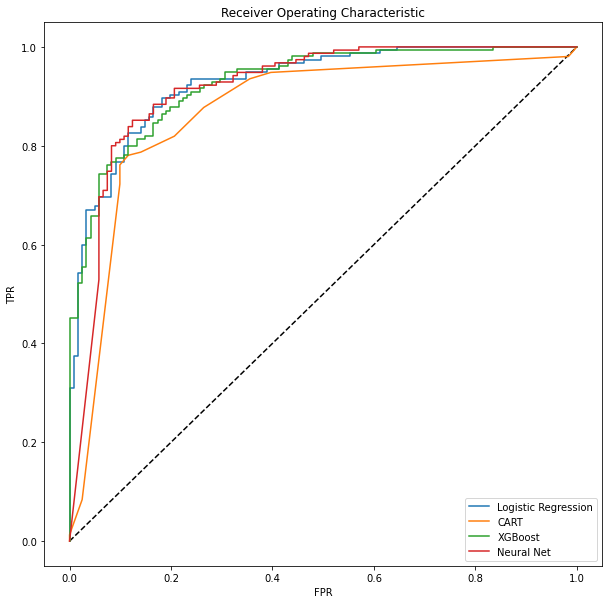

In [118]:
y_pred_prob1 = lr_baseline.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = cart_v2.predict_proba(X_test)[:,1]
fpr_cart, tpr_cart, thresholds_cart = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = xgb_v1.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = nn_v1.predict_proba(X_test)[:,1]
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob4)


plt.figure(figsize = (10, 10))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression')
plt.plot(fpr_cart, tpr_cart, label = 'CART')
plt.plot(fpr_xgb, tpr_xgb, label = 'XGBoost')
plt.plot(fpr_nn, tpr_nn, label = 'Neural Net')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()